In [1]:
import sys
sys.path.append('..')

import os

import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt

from ipywidgets.widgets import interact, IntSlider, fixed
import ipywidgets as widgets

from src.visualisation import PatientSnapshot
from src.segmentation import threshold_segmentation
from src.utils import remove_legs, are_legs
import morphsnakes as ms

If you use TorchIO for your research, please cite the following paper:

Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning
(https://arxiv.org/abs/2003.04696)


In [2]:
patient_path = '../data/1/'
patient = PatientSnapshot.from_path(patient_path, mask_path=None)

In [3]:
patient.snapshot = remove_legs(patient.snapshot)

In [4]:
img = patient.snapshot[200]

In [5]:
patient.snapshot.shape

(537, 512, 512)

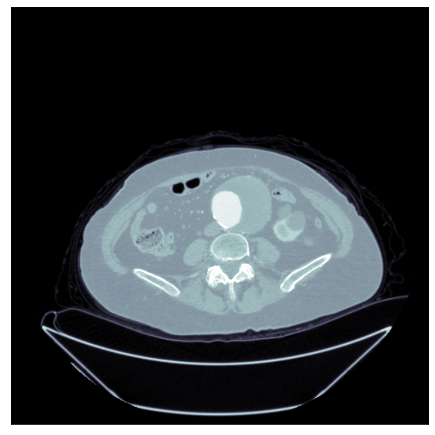

In [6]:
patient.horizontal_plot(z=200, vmin=-1000, vmax=500)

In [7]:
img.astype('float64')

array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       ...,
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.]])

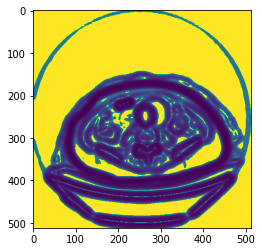

In [82]:
# gimg = ms.inverse_gaussian_gradient(img, alpha=5.0, sigma=3.0)
gimg = ms.inverse_gaussian_gradient(img, alpha=5.0, sigma=5.0)
plt.imshow(gimg)

(537, 512, 512)


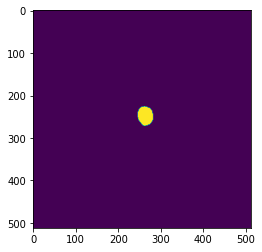

In [85]:
aneurism_center = (240, 260)
radius = 20
level_set = ms.circle_level_set(img.shape, aneurism_center, radius)
num_iterations = 150
mask = ms.morphological_geodesic_active_contour(gimg.astype('float64'), num_iterations, level_set)
plt.imshow(mask)
mask = np.repeat(mask[np.newaxis, :, :], patient.snapshot.shape[0], axis=0)
print(mask.shape)

(537, 512, 512)
(537, 512, 512)


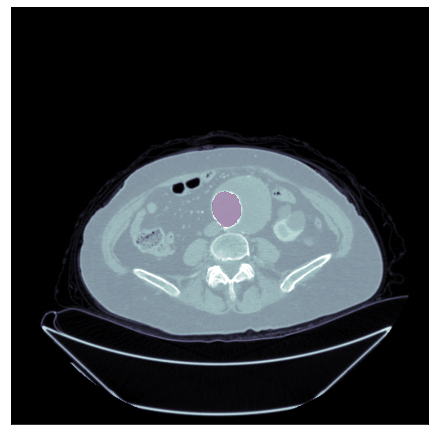

In [86]:
print(patient.snapshot.shape)
print(mask.shape)
patient.mask = mask
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)